In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

print(os.getcwd())
os.chdir(os.getcwd()[:-9] + 'rl/dynamic_td/final_case')
print(os.getcwd())

from env import final_env
from draw_policy import draw
from draw_policy import plot_soc_traj

/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Spring 2023/CE290/pev_intelligent_charging_control/notebooks
/Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Spring 2023/CE290/pev_intelligent_charging_control/rl/dynamic_td/final_case


In [2]:
import seaborn as sns

In [7]:
plt.rcParams["figure.dpi"] = 100
# plt.style.use('dark_background')
sessions = pd.read_csv('../../../data/sessions_12min.csv').drop(['Unnamed: 0'], axis=1)
price_curve = pd.read_csv('../../../data/price_day_idx_12min.csv')['price'].values
price_curve = np.concatenate((price_curve, price_curve), axis=0)

In [5]:
sessions.head()

,User_ID,Start_plugin,End_plugout,El_kWh,Duration_hours,month_plugin,weekdays_plugin,end_soc,start_soc,start_day_idx,end_day_idx,delta_t,delta_soc_rounded
0,AdO3-4,2018-12-21 11:33:00,2018-12-21 19:46:00,29.87,8.216667,Dec,Friday,1,0.631,57,98,40,0.36
1,AdO3-2,2018-12-24 23:32:00,2018-12-25 17:37:00,16.14,18.083333,Dec,Monday,1,0.800,117,208,90,0.20
2,AdO3-2,2018-12-25 18:25:00,2018-12-26 16:08:00,10.33,21.716667,Dec,Tuesday,1,0.872,92,200,107,0.12
3,AdO3-4,2018-12-26 10:41:00,2018-12-26 16:52:00,27.66,6.183333,Dec,Wednesday,1,0.658,53,84,30,0.34
4,AdO3-2,2018-12-29 16:04:00,2018-12-29 20:55:00,8.58,4.850000,Dec,Saturday,1,0.894,80,104,23,0.10


## control strategy comparison

### overnight, small deltaSOC

session, startSOC=80.0%, deltaT=16.0hrs, t=18.0

======== Optimal Policy: ========
Total SOC charged = 0.2
Total state value = -1394.6677559999998
Total energyCharged cost = $ -13.243

======= Baseline Policy: ========
Total energyCharged cost = $ 9.44704

========= Evaluation: ===========
Charging Cost saved = $ -22.69 , -240.179 %


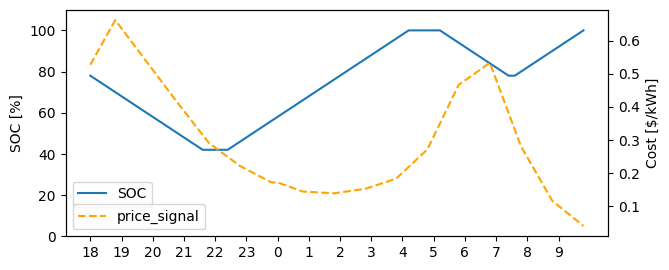

In [8]:
state = [0.2, 80, 90]
policy = np.load('policy/iter10x120_charging_limit.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)

plot_soc_traj(opt_action, state, price_curve)

session, startSOC=80.0%, deltaT=16.0hrs, t=18.0

======== Optimal Policy: ========
Total SOC charged = 0.2
Total state value = -900.351888
Total energyCharged cost = $ -0.81

======= Baseline Policy: ========
Total energyCharged cost = $ 9.44704

========= Evaluation: ===========
Charging Cost saved = $ -10.257 , -108.576 %


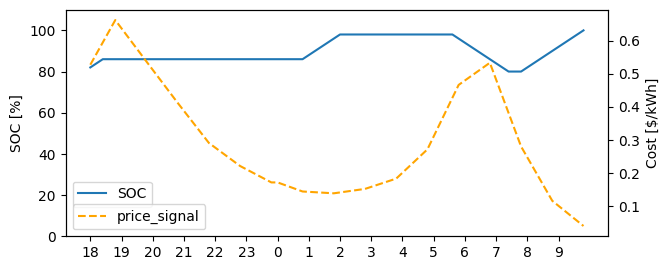

In [13]:
# state = [0.1, 80, 50]
policy = np.load('policy/iter4x120-highSOC_penalty_large.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)

plot_soc_traj(opt_action, state, price_curve)

session, startSOC=80.0%, deltaT=16.0hrs, t=18.0

======== Optimal Policy: ========
Total SOC charged = 0.2
Total state value = -1195.296744
Total energyCharged cost = $ -11.876

======= Baseline Policy: ========
Total energyCharged cost = $ 9.44704

========= Evaluation: ===========
Charging Cost saved = $ -21.323 , -225.709 %


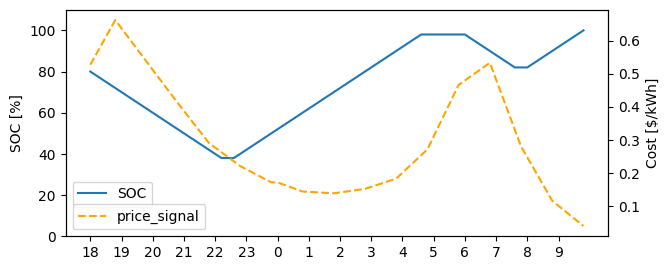

In [14]:
# state = [0.1, 80, 50]
policy = np.load('policy/iter3x120-highSOC_penalty_small_45-75.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)

plot_soc_traj(opt_action, state, price_curve)

### overnight, high deltaSOC

session, startSOC=40.0%, deltaT=16.0hrs, t=16.0

======== Optimal Policy: ========
Total SOC charged = 0.6
Total state value = -1701.9922200000003
Total energyCharged cost = $ -0.106

======= Baseline Policy: ========
Total energyCharged cost = $ 20.410239999999998

========= Evaluation: ===========
Charging Cost saved = $ -20.517 , -100.521 %


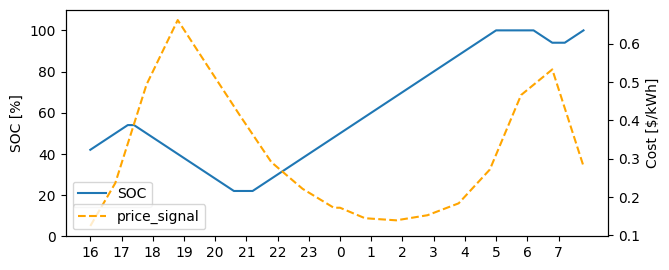

In [15]:
state = [0.6, 80, 80]
policy = np.load('policy/iter10x120_charging_limit.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)

plot_soc_traj(opt_action, state, price_curve)

session, startSOC=40.0%, deltaT=16.0hrs, t=16.0

======== Optimal Policy: ========
Total SOC charged = 0.6
Total state value = -5.227424
Total energyCharged cost = $ 5.997

======= Baseline Policy: ========
Total energyCharged cost = $ 20.410239999999998

========= Evaluation: ===========
Charging Cost saved = $ -14.413 , -70.616 %


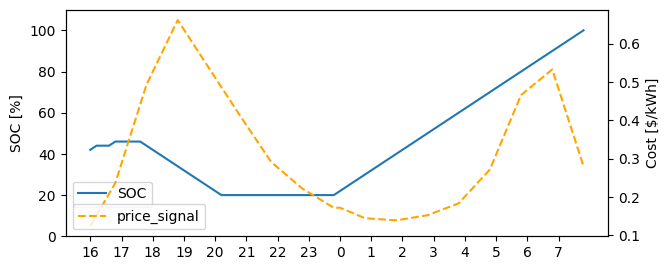

In [16]:
# state = [0.1, 80, 50]
policy = np.load('policy/iter4x120-highSOC_penalty_large.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)
plot_soc_traj(opt_action, state, price_curve)

session, startSOC=40.0%, deltaT=16.0hrs, t=16.0

======== Optimal Policy: ========
Total SOC charged = 0.6
Total state value = -205.13087599999997
Total energyCharged cost = $ 5.554

======= Baseline Policy: ========
Total energyCharged cost = $ 20.410239999999998

========= Evaluation: ===========
Charging Cost saved = $ -14.856 , -72.789 %


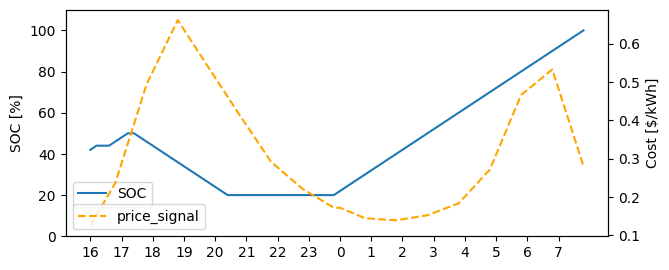

In [17]:
policy = np.load('policy/iter3x120-highSOC_penalty_small_45-75.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)
plot_soc_traj(opt_action, state, price_curve)

### daytime, low deltaSOC

session, startSOC=90.0%, deltaT=8.0hrs, t=8.0

======== Optimal Policy: ========
Total SOC charged = 0.1
Total state value = -999.247112
Total energyCharged cost = $ -1.619

======= Baseline Policy: ========
Total energyCharged cost = $ 1.45184

========= Evaluation: ===========
Charging Cost saved = $ -3.071 , -211.497 %


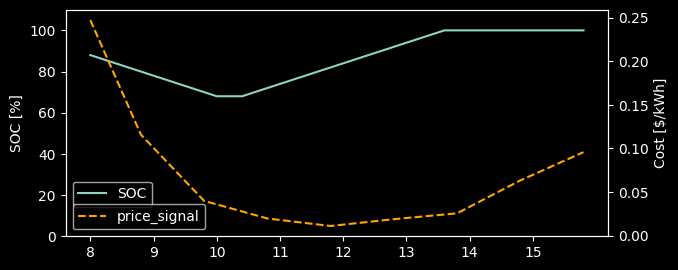

In [68]:
state = [0.1, 40, 40]
policy = np.load('policy/iter10x120_charging_limit.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)

plot_soc_traj(opt_action, state, price_curve)

session, startSOC=90.0%, deltaT=8.0hrs, t=8.0

======== Optimal Policy: ========
Total SOC charged = 0.1
Total state value = -500.06483999999995
Total energyCharged cost = $ 0.104

======= Baseline Policy: ========
Total energyCharged cost = $ 1.45184

========= Evaluation: ===========
Charging Cost saved = $ -1.348 , -92.854 %


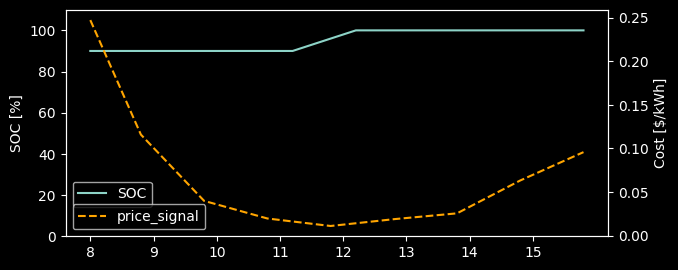

In [69]:
policy = np.load('policy/iter4x120-highSOC_penalty_large.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)
plot_soc_traj(opt_action, state, price_curve)

session, startSOC=90.0%, deltaT=8.0hrs, t=8.0

======== Optimal Policy: ========
Total SOC charged = 0.1
Total state value = -500.06483999999995
Total energyCharged cost = $ 0.104

======= Baseline Policy: ========
Total energyCharged cost = $ 1.45184

========= Evaluation: ===========
Charging Cost saved = $ -1.348 , -92.854 %


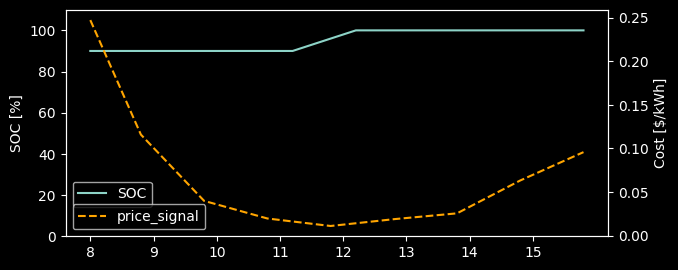

In [70]:
policy = np.load('policy/iter3x120-highSOC_penalty_small_45-75.npy')
opt_cost, baseline_cost, opt_action, baseline_reward = draw(state, policy, draw=False)
plot_soc_traj(opt_action, state, price_curve)

## degradation constraint

In [9]:
highSOC_charging_45_75 = np.zeros((int(1/0.02), 120))
for i, deltaSOC in enumerate(np.linspace(0, 1, int(1/0.02))):
    for j, deltaT in enumerate(np.arange(0, 120)):

        T_to_soc_target = deltaSOC / 0.02
        if (T_to_soc_target**1.3 < deltaT) & (deltaSOC <= 0.25 or deltaSOC >= 0.55):
            highSOC_charging_45_75[i, j] = 1
        elif T_to_soc_target < deltaT:
            highSOC_charging_45_75[i, j] = 0.25
        else:
            pass

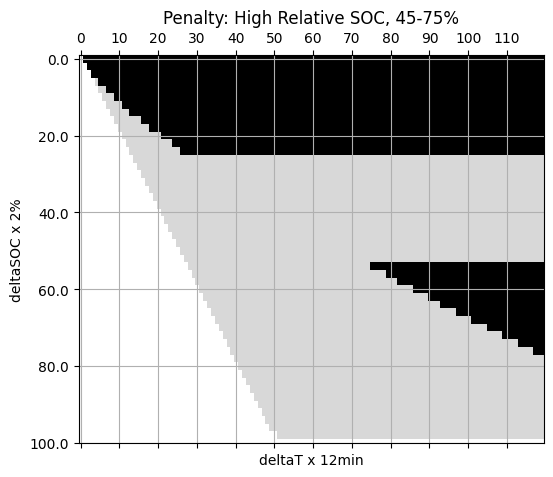

In [12]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging_45_75, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
plt.yticks(np.arange(0, 60, 10), np.linspace(0, 100, 6))
plt.title('Penalty: High Relative SOC, 45-75%')
plt.grid()
# plt.colorbar()
plt.show()

In [86]:
highSOC_charging = np.zeros((int(1/0.02), 120))
for i, deltaSOC in enumerate(np.linspace(0, 1, int(1/0.02))):
    for j, deltaT in enumerate(np.arange(0, 120)):

        T_to_soc_target = deltaSOC / 0.02
        # if 3 * T_to_soc_target < deltaT:
        #     highSOC_charging[i, j] = 1
        if (T_to_soc_target**1.3 < deltaT) & (deltaSOC <= 0.25 or deltaSOC >= 0.35):
            highSOC_charging[i, j] = 1
        elif T_to_soc_target < deltaT:
            highSOC_charging[i, j] = 0.25
        else:
            pass

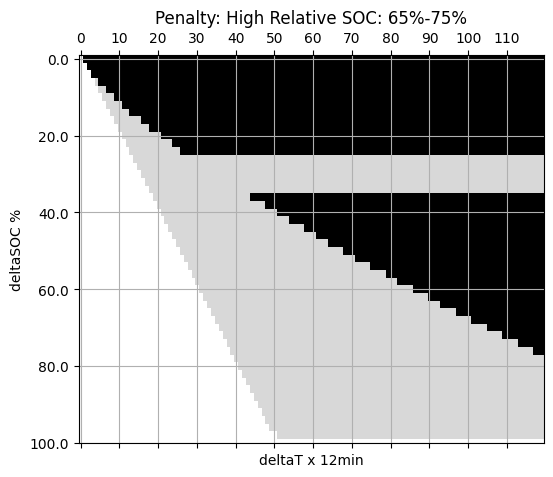

In [95]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC %')
plt.xticks(np.arange(0, 120, 10))
plt.yticks(np.arange(0, 60, 10), np.linspace(0, 100, 6))
plt.title('Penalty: High Relative SOC: 65%-75%')
plt.grid()
# plt.colorbar()
plt.show()

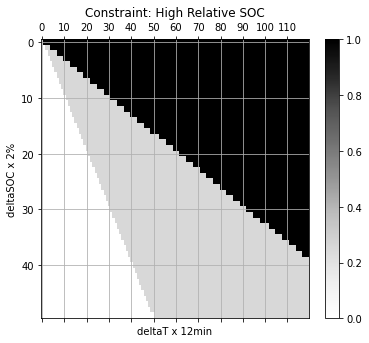

In [122]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
# plt.yticks(np.arange(0, 50, 10), np.linspace(0, 1, 5).round(1))
plt.title('Constraint: High Relative SOC')
plt.grid()
plt.colorbar()
plt.show()

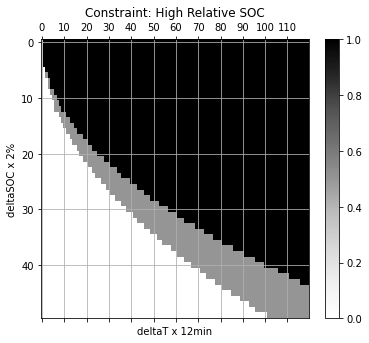

In [94]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
# plt.yticks(np.arange(0, 50, 10), np.linspace(0, 1, 5).round(1))
plt.title('Constraint: High Relative SOC')
plt.grid()
plt.colorbar()
plt.show()

## Residential Charging Sessions Evaluation

In [64]:
plt.style.use('default')

In [80]:
def session_evaluation(policy):

    sessions_opt_cost = []
    sessions_baseline_cost = []
    sessions_opt_action = []
    sessions_baseline_action = []

    for i in tqdm(range(sessions.shape[0])):


        state = [
            sessions.loc[i, 'delta_soc_rounded'], 
            sessions.loc[i, 'delta_t'], 
            sessions.loc[i, 'start_day_idx']
        ]
        opt_cost, baseline_cost, opt_action_none, baseline_action_none = draw(state, policy, draw=False, supress_print=True)

        sessions_opt_cost.append(opt_cost)
        sessions_baseline_cost.append(baseline_cost)

        opt_action = [0 if action is None else action for action in opt_action_none]
        baseline_action = [0 if action is None else action for action in baseline_action_none]

        sessions_opt_action.append(opt_action)
        sessions_baseline_action.append(baseline_action)
    
    return sessions_opt_cost, sessions_baseline_cost, sessions_opt_action, sessions_baseline_action

### Max Utilization

In [81]:
# control strategy 1: max utilization

policy = np.load('policy/iter10x120_charging_limit.npy')
sessions_opt_cost1, sessions_baseline_cost1, sessions_opt_action1, sessions_baseline_action1 = \
    session_evaluation(policy)

100%|██████████| 4563/4563 [00:15<00:00, 300.71it/s]


### Min Degradation (65% - 75%)

In [82]:
# control strategy 2: min degradation (65%-75%)

policy = np.load('policy/iter4x120-highSOC_penalty_large.npy')
sessions_opt_cost2, _, sessions_opt_action2, _ = \
    session_evaluation(policy)

100%|██████████| 4563/4563 [00:15<00:00, 301.93it/s]


### Min Degradation (45% - 75%)

In [83]:
# control strategy 2: min degradation (45%-75%)

policy = np.load('policy/iter4x120-highSOC_penalty_small_45-75.npy')
sessions_opt_cost3, _, sessions_opt_action3, _ = \
    session_evaluation(policy)

100%|██████████| 4563/4563 [00:14<00:00, 324.31it/s]


### Comparison

In [69]:
# average session charging costs

np.average(sessions_baseline_cost1), \
    np.average(sessions_opt_cost1), \
        np.average(sessions_opt_cost2), \
            np.average(sessions_opt_cost3)

(4.681193951347797,
 -5.092785171159325,
 -0.7102057628753016,
 -1.0680877703265397)

### Average Session Cost

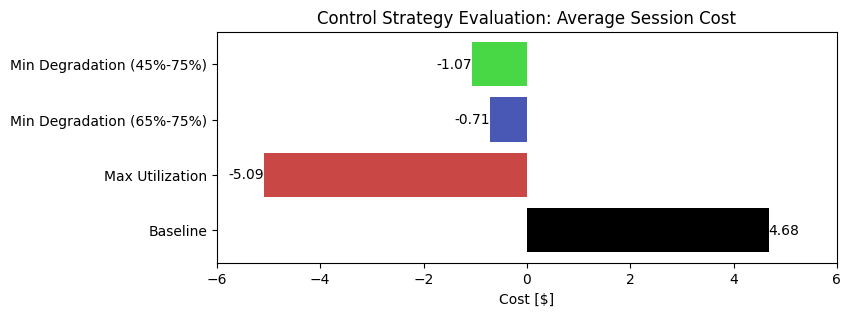

In [70]:
x_labels = ['Baseline', 'Max Utilization', 'Min Degradation (65%-75%)', 'Min Degradation (45%-75%)']
values = [np.average(sessions_baseline_cost1), np.average(sessions_opt_cost1), np.average(sessions_opt_cost2), np.average(sessions_opt_cost3)]
values = [round(value, 2) for value in values]

fig, ax = plt.subplots(figsize=(8, 3))
bar_container = ax.barh(x_labels, values, color=['black', '#C94845', '#4958B5', '#49D845', '#777777'])
ax.set(xlabel='Cost [$]', title='Control Strategy Evaluation: Average Session Cost')
ax.set_xlim(-6, 6)
ax.bar_label(bar_container)
plt.show()

% sessions with 0 or negative charging session cost

In [196]:
sum(np.array(sessions_opt_cost1)<=0) / len(sessions_opt_cost1), \
    sum(np.array(sessions_opt_cost2)<=0) / len(sessions_opt_cost1), \
        sum(np.array(sessions_opt_cost3)<=0) / len(sessions_opt_cost1)

(0.6769669077361385, 0.4262546570238878, 0.4334867411790489)

average session cost reduction

In [230]:
np.average((np.array(sessions_opt_cost3) - np.array(sessions_baseline_cost1)) / np.array(sessions_baseline_cost1) * 100)

-278.175303876853

### Energy Consumption

In [84]:
# kWh
energy_demand_baseline = np.zeros((240))
energy_demand_opt1 = np.copy(energy_demand_baseline)
energy_demand_opt2 = np.copy(energy_demand_baseline)
energy_demand_opt3 = np.copy(energy_demand_baseline)

# sessions_baseline_action1 = [0 if action is None else action for action in sessions_baseline_action1]
# sessions_opt_action1 = [0 if action is None else action for action in sessions_opt_action1]
# sessions_opt_action2 = [0 if action is None else action for action in sessions_opt_action2]
# sessions_opt_action3 = [0 if action is None else action for action in sessions_opt_action3]

for i in tqdm(range(len(sessions_opt_action1))):
    for t in range(240):
        energy_demand_baseline[t] += sessions_baseline_action1[i][t] * 0.02 * 80
        energy_demand_opt1[t] += sessions_opt_action1[i][t] * 0.02 * 80
        energy_demand_opt2[t] += sessions_opt_action2[i][t] * 0.02 * 80
        energy_demand_opt3[t] += sessions_opt_action3[i][t] * 0.02 * 80

100%|██████████| 4563/4563 [00:01<00:00, 2883.91it/s]


battery discharge utilization

In [204]:
battery_util_opt1 = np.zeros(len(sessions_opt_action1))
battery_util_opt2 = np.copy(battery_util_opt1)
battery_util_opt3 = np.copy(battery_util_opt1)

for i in tqdm(range(len(sessions_opt_action1))):
    battery_util_opt1[i] += np.sum(np.abs(np.array(sessions_opt_action1[i])<0)) * 0.02 * 80
    battery_util_opt2[i] += np.sum(np.abs(np.array(sessions_opt_action2[i])<0)) * 0.02 * 80
    battery_util_opt3[i] += np.sum(np.abs(np.array(sessions_opt_action3[i])<0)) * 0.02 * 80

battery_util_opt1 /= 80
battery_util_opt2 /= 80
battery_util_opt3 /= 80

100%|██████████| 4563/4563 [00:00<00:00, 13793.67it/s]


In [231]:
# Max Utilization: energy delivered back to the grid
sum(battery_util_opt1) * 80

121763.1999999992

In [206]:
0, np.average(battery_util_opt1),\
    np.average(battery_util_opt2), \
        np.average(battery_util_opt3),

(0, 0.33356125356125355, 0.1811571334648258, 0.20386587771203157)

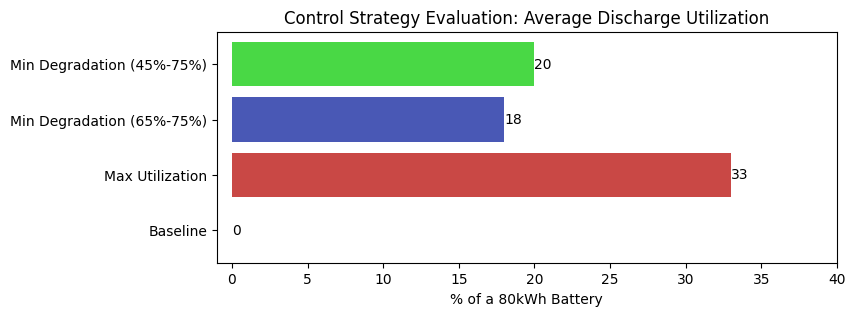

In [222]:
x_labels = ['Baseline', 'Max Utilization', 'Min Degradation (65%-75%)', 'Min Degradation (45%-75%)']
values = [0, np.average(battery_util_opt1),\
    np.average(battery_util_opt2), \
        np.average(battery_util_opt3),]
values = [100*round(value, 2) for value in values]

fig, ax = plt.subplots(figsize=(8, 3))
bar_container = ax.barh(x_labels, values, color=['black', '#C94845', '#4958B5', '#49D845', '#777777'])
ax.set(xlabel='% of a 80kWh Battery', title='Control Strategy Evaluation: Average Discharge Utilization')
ax.set_xlim(-1, 40)
ax.bar_label(bar_container)
plt.show()

In [103]:
energy_demand_baseline_24h = np.zeros(120)
energy_demand_opt1_24h = np.zeros(120)
energy_demand_opt2_24h = np.zeros(120)
energy_demand_opt3_24h = np.zeros(120)


for i in range(len(energy_demand_opt2)):
    if i <= 119:
        energy_demand_baseline_24h[i] += energy_demand_baseline[i]
        energy_demand_opt1_24h[i] += energy_demand_opt1[i]
        energy_demand_opt2_24h[i] += energy_demand_opt2[i]
        energy_demand_opt3_24h[i] += energy_demand_opt3[i]
    else:
        energy_demand_baseline_24h[i-120] += energy_demand_baseline[i]
        energy_demand_opt1_24h[i-120] += energy_demand_opt1[i]
        energy_demand_opt2_24h[i-120] += energy_demand_opt2[i]
        energy_demand_opt3_24h[i-120] += energy_demand_opt3[i]

In [115]:
energy_demand_baseline_24h_byhour = []
energy_demand_opt1_24h_byhour = []
energy_demand_opt2_24h_byhour = []
energy_demand_opt3_24h_byhour = []

# loop through the input list, adding up every five values
for i in range(0, 120, 5):

    energy_demand_baseline_24h_byhour.append(sum(energy_demand_baseline_24h[i:i+5]))
    energy_demand_opt1_24h_byhour.append(sum(energy_demand_opt1_24h[i:i+5]))
    energy_demand_opt2_24h_byhour.append(sum(energy_demand_opt2_24h[i:i+5]))
    energy_demand_opt3_24h_byhour.append(sum(energy_demand_opt3_24h[i:i+5]))


In [157]:
price_curve_byhour = pd.read_csv('../../../data/raw/TwoPeakHDP.csv').head(24)['Price'].values

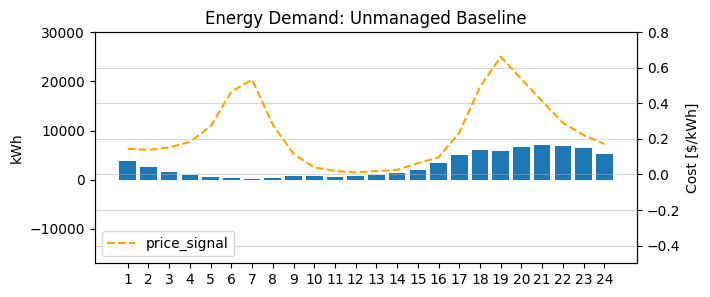

In [189]:
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
plt.grid(alpha=0.5)

ax1.bar(np.arange(24), energy_demand_baseline_24h_byhour)
ax1.set_xticks(np.arange(0, 24), np.arange(1, 25))
ax1.set_ylim(-17000, 30000)


ax2.plot(price_curve_byhour, '--', c='orange', label='price_signal')
ax2.set_ylim(-0.5, 0.8)
ax2.legend(loc=3)
plt.ylabel('kWh')
plt.title('Energy Demand: Unmanaged Baseline')
ax1.set_ylabel('kWh')
ax2.set_ylabel('Cost [$/kWh]')
plt.show()

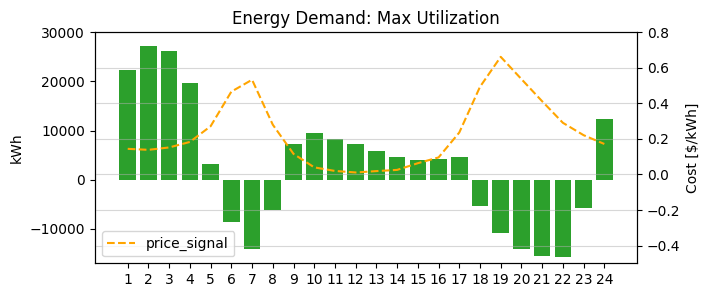

In [190]:
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
plt.grid(alpha=0.5)

ax1.bar(np.arange(24), energy_demand_opt1_24h_byhour, color='#2ca02c')
ax1.set_xticks(np.arange(0, 24), np.arange(1, 25))
ax1.set_ylim(-17000, 30000)

ax2.plot(price_curve_byhour, '--', c='orange', label='price_signal')
ax2.set_ylim(-0.5, 0.8)
ax2.legend(loc=3)
ax1.set_ylabel('kWh')
ax2.set_ylabel('Cost [$/kWh]')
plt.title('Energy Demand: Max Utilization')

plt.show()

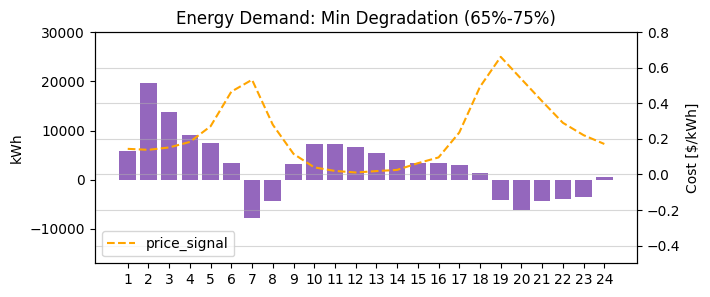

In [191]:
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
plt.grid(alpha=0.5)

ax1.bar(np.arange(24), energy_demand_opt2_24h_byhour, color='#9467bd')
ax1.set_xticks(np.arange(0, 24), np.arange(1, 25))
ax1.set_ylim(-17000, 30000)

ax2.plot(price_curve_byhour, '--', c='orange', label='price_signal')
ax2.set_ylim(-0.5, 0.8)
ax2.legend(loc=3)
ax1.set_ylabel('kWh')
ax2.set_ylabel('Cost [$/kWh]')
plt.title('Energy Demand: Min Degradation (65%-75%)')
plt.show()

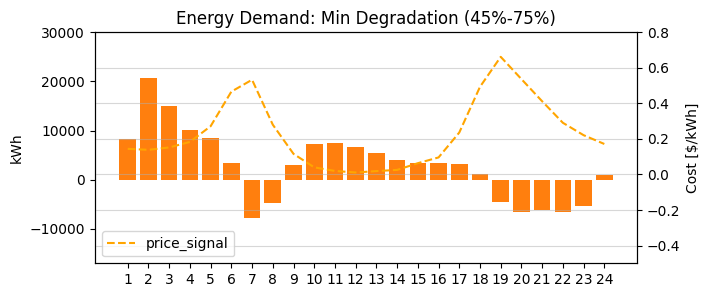

In [192]:
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
plt.grid(alpha=0.5)

ax1.bar(np.arange(24), energy_demand_opt3_24h_byhour, color='#ff7f0e')
ax1.set_xticks(np.arange(0, 24), np.arange(1, 25))
ax1.set_ylim(-17000, 30000)

ax2.plot(price_curve_byhour, '--', c='orange', label='price_signal')
ax2.set_ylim(-0.5, 0.8)
ax2.legend(loc=3)
ax1.set_ylabel('kWh')
ax2.set_ylabel('Cost [$/kWh]')
plt.title('Energy Demand: Min Degradation (45%-75%)')
plt.show()